**Importing Dataset** 


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Main**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [70]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/Tameto/train", target_size=(256,256), batch_size=32 )

val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/Tameto/valid", target_size=(256,256), batch_size=32 )

Found 18355 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


**Testing Image**

In [71]:
t_img , label = train.next()

In [72]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5)) 
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


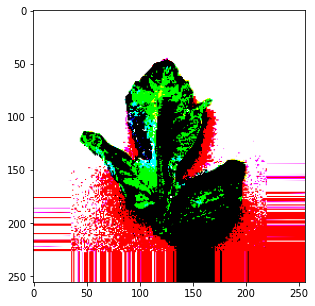

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


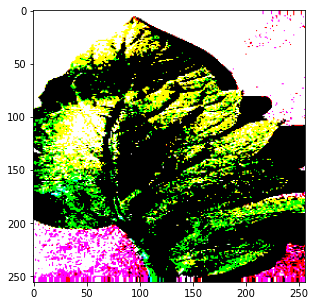

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


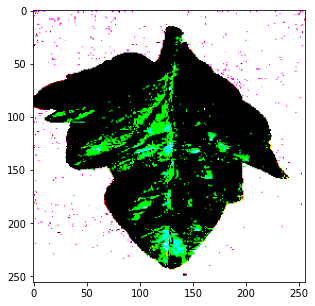

In [73]:
plotImage(t_img[:3],label[:3])

**Model**

In [74]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [75]:
base_model = VGG19(input_shape=(256, 256,3), include_top= False)

In [76]:
for layer in base_model.layers:
  layer.trainable = False

In [77]:
X = X = Flatten() (base_model.output)
X = Dense (units= 10, activation='softmax')(X)

model = Model(base_model.input, X)

In [78]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

**Early Stopping and Model Checkpoints**

In [79]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta= 0.01,
                    patience= 3,
                    verbose=1 ,
                    save_best_only= True)

cb = [es,mc]

In [81]:
his = model.fit(train ,
                steps_per_epoch= 16,
                epochs= 50,
                verbose= 1,
                callbacks= cb ,
                validation_data= val ,
                validation_steps= 16)

Epoch 1/50
16/16 [==============================] - 242s 16s/step - loss: 12.4597 - accuracy: 0.3750 - val_loss: 10.1541 - val_accuracy: 0.5391

Epoch 00001: val_accuracy improved from -inf to 0.53906, saving model to best_model.h5
Epoch 2/50
16/16 [==============================] - 221s 14s/step - loss: 8.0586 - accuracy: 0.5645 - val_loss: 12.7059 - val_accuracy: 0.4980

Epoch 00002: val_accuracy did not improve from 0.53906
Epoch 3/50
16/16 [==============================] - 208s 13s/step - loss: 7.4792 - accuracy: 0.5977 - val_loss: 7.1894 - val_accuracy: 0.6406

Epoch 00003: val_accuracy improved from 0.53906 to 0.64062, saving model to best_model.h5
Epoch 4/50
16/16 [==============================] - 193s 12s/step - loss: 5.8967 - accuracy: 0.6816 - val_loss: 5.7441 - val_accuracy: 0.6875

Epoch 00004: val_accuracy improved from 0.64062 to 0.68750, saving model to best_model.h5
Epoch 5/50
16/16 [==============================] - 182s 12s/step - loss: 6.0651 - accuracy: 0.6875 - v